#### i was confused of this project. i thought the goal is expecting the next value of y by x, but this project is about expecting y value by the right before y value. 

In [507]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [508]:
class TimeSeriesData():
    
    def __init__ (self, num_points, xmax, xmin):
        self.num_points = num_points
        self.xmax = xmax
        self.xmin = xmin
        self.resolution = (xmax- xmin)/num_points
        self.x_data = np.linspace(xmin, xmax , num_points)
        self.y_true = np.sin(self.x_data)
        
    def return_true(selft, x_series):
        return np.sin(x_series)
    
    def next_batch(self, batch_size, steps, return_batch_ts = False):
        # get random starting point in time series
        
        random_point = np.random.rand(batch_size , 1)
        random_starting_on_ts = random_point * (self.xmax - self.xmin - (steps*self.resolution))
        
        # create batch time series
        batch_ts = random_starting_on_ts + np.arange(0.0,steps+1)*self.resolution
        
        y_batch = np.sin(batch_ts)
        
        # returning batch in tuple
        # first item is current step
        # second item is target item which is the next step of current step
        if return_batch_ts:
            return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1), batch_ts
        else:
            return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1) 

In [545]:
timeSeriesDate_obj = TimeSeriesData(100,xmin=0, xmax=1)


In [546]:
timeSeriesDate_obj.x_data

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

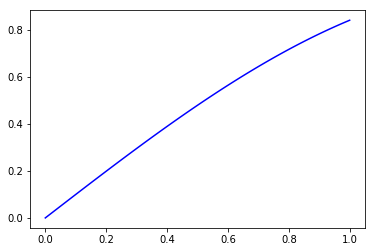

In [547]:
plt.plot(timeSeriesDate_obj.x_data, timeSeriesDate_obj.y_true, "b")

<hr>

### checking TimeSeriesData class next_batch()

next_batch() return part of sin 

In [562]:
num_time_steps = 30

In [563]:
# timeSeriesDate_obj is made with xmax and xmin
#  and timeSeriesDate_obj's resolution is decided already
#  we getting time series from random starting point which is the range of timeSeriesDate_obj 
#  we will get points as much as num_time_steps 
y1, y1, ts = timeSeriesDate_obj.next_batch(batch_size=1, steps= num_time_steps, return_batch_ts=True)

In [564]:
y1.flatten()

array([0.55356496, 0.5618652 , 0.57010926, 0.5782963 , 0.58642552,
       0.5944961 , 0.60250722, 0.6104581 , 0.61834793, 0.62617593,
       0.63394131, 0.64164329, 0.64928111, 0.65685401, 0.66436122,
       0.67180199, 0.67917559, 0.68648126, 0.69371829, 0.70088595,
       0.70798352, 0.7150103 , 0.72196557, 0.72884865, 0.73565884,
       0.74239547, 0.74905785, 0.75564534, 0.76215726, 0.76859296])

In [565]:
ts.flatten()

array([0.57663883, 0.58663883, 0.59663883, 0.60663883, 0.61663883,
       0.62663883, 0.63663883, 0.64663883, 0.65663883, 0.66663883,
       0.67663883, 0.68663883, 0.69663883, 0.70663883, 0.71663883,
       0.72663883, 0.73663883, 0.74663883, 0.75663883, 0.76663883,
       0.77663883, 0.78663883, 0.79663883, 0.80663883, 0.81663883,
       0.82663883, 0.83663883, 0.84663883, 0.85663883, 0.86663883,
       0.87663883])

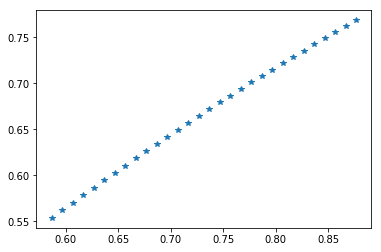

In [566]:
plt.plot(ts.flatten()[1:], y1.flatten(),"*")

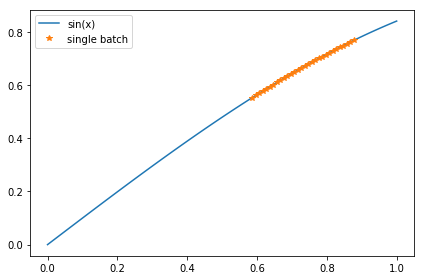

In [567]:
plt.plot(timeSeriesDate_obj.x_data, timeSeriesDate_obj.y_true, label="sin(x)")
plt.plot(ts.flatten()[1:], y1.flatten(),"*", label="single batch")

plt.legend()
plt.tight_layout()

<hr>

### expecting next tartget value by given current points

In [568]:
# 5 is random number, it could be any number

num_instance_steps = 20

single_training_instance = np.linspace(5, 5 + timeSeriesDate_obj.resolution * num_instance_steps, num_instance_steps)
single_training_instance

array([5.        , 5.01052632, 5.02105263, 5.03157895, 5.04210526,
       5.05263158, 5.06315789, 5.07368421, 5.08421053, 5.09473684,
       5.10526316, 5.11578947, 5.12631579, 5.13684211, 5.14736842,
       5.15789474, 5.16842105, 5.17894737, 5.18947368, 5.2       ])

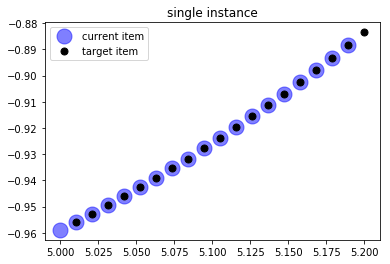

In [569]:
plt.title("single instance")
plt.plot(single_training_instance[:-1], timeSeriesDate_obj.return_true(single_training_instance[:-1]),"bo", markersize=15, alpha=0.5, label ="current item")
plt.plot(single_training_instance[1:], timeSeriesDate_obj.return_true(single_training_instance[1:]), "ko", markersize="7", label="target item")
plt.legend()

<hr>

## creating model

In [570]:
tf.reset_default_graph()

In [571]:
# these are hyperparameters 

num_inputs = 1
num_outputs = 1
num_neurons = 300
learning_rate = 0.0005
num_training_iterations = 3000
batch_size = 1

In [572]:
# placeholder

In [573]:
X = tf.placeholder(tf.float32, shape=[None,num_instance_steps, num_inputs])
y = tf.placeholder(tf.float32, shape=[None,num_instance_steps, num_outputs])

In [574]:
# RNN cell layer

#### about OutputProjectionWrapper
ref) https://www.oreilly.com/library/view/neural-networks-and/9781492037354/ch04.html

At each time step we now have an output vector of size 100. But what we actually want is a single output value at each time step. The simplest solution is to wrap the cell in an OutputProjectionWrapper. A cell wrapper acts like a normal cell, proxying every method call to an underlying cell, but it also adds some functionality. The 
OutputProjectionWrapper adds a fully connected layer of linear neurons (i.e., without any activation function) on top of each output (but it does not affect the cell state). All these fully connected layers share the same (trainable) weights and bias terms. The resulting RNN is represented in Figure 4-8.

In [575]:
# we can try many different type of cells

cell = tf.contrib.rnn.BasicRNNCell(num_neurons, activation= tf.nn.relu)
# cell = tf.contrib.rnn.GRUCell(num_neurons, activation= tf.nn.relu)
cell = tf.contrib.rnn.OutputProjectionWrapper(cell,output_size=num_outputs)

In [576]:
outputs, states = tf.nn.dynamic_rnn(cell, inputs=X, dtype = tf.float32)

In [577]:
# MSE 

loss = tf.reduce_mean(tf.square(outputs - y)) 

In [578]:
# optimizer

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

In [579]:
train = optimizer.minimize(loss)

In [580]:
init = tf.global_variables_initializer()

In [581]:
# session

In [582]:
# this is for only gpu, larger number of per_process_gpu_memory_fraction will use larger memory size of gpu memory 
# gpu_option = tf.GPUOptions(per_process_gpu_memory_fraction = 0.8)

In [583]:
saver = tf.train.Saver()

In [584]:
# this is for gpu session with option 
# with tf.Session(config=tf.ConfigProto(gpu_option = gpu_option)) as sess:

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_training_iterations):
        X_batch, y_batch = timeSeriesDate_obj.next_batch(batch_size=1, steps=num_instance_steps, return_batch_ts=False)
        
        sess.run(train, feed_dict={X:X_batch, y:y_batch})
        
        if i%100 ==0:
            mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
            
            print(i,"\tMSE :",mse)
            
    saver.save(sess,"./saved_model_from_RNN_with_TensorFlow/jacob_test_rnn")

0 	MSE : 0.05343
100 	MSE : 0.009626958
200 	MSE : 0.0015062715
300 	MSE : 0.0011889288
400 	MSE : 0.00027184322
500 	MSE : 0.00034820588
600 	MSE : 2.1257005e-05
700 	MSE : 1.4648105e-06
800 	MSE : 8.931072e-06
900 	MSE : 9.26669e-07
1000 	MSE : 4.719667e-06
1100 	MSE : 9.930989e-06
1200 	MSE : 9.477338e-07
1300 	MSE : 2.0327964e-06
1400 	MSE : 1.8275548e-06
1500 	MSE : 2.2083716e-06
1600 	MSE : 5.762339e-07
1700 	MSE : 3.0746236e-07
1800 	MSE : 6.547022e-07
1900 	MSE : 2.0902708e-07
2000 	MSE : 2.1161914e-06
2100 	MSE : 1.2097739e-05
2200 	MSE : 5.332149e-06
2300 	MSE : 3.049555e-06
2400 	MSE : 6.9953904e-07
2500 	MSE : 3.7176444e-06
2600 	MSE : 9.984944e-06
2700 	MSE : 4.240581e-05
2800 	MSE : 3.939275e-06
2900 	MSE : 4.9828157e-07


<hr>

## test new data

In [591]:
np.linspace(10, 15, num= 21)

array([10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75, 12.  ,
       12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75, 14.  , 14.25,
       14.5 , 14.75, 15.  ])

In [597]:
X_base_data = np.linspace(0, 1, num= 21)
X_new_given_data = X_base_data[:-1]
X_new_given_data

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [598]:
y_new_true = np.sin(X_base_data)
y_new_true

array([0.        , 0.04997917, 0.09983342, 0.14943813, 0.19866933,
       0.24740396, 0.29552021, 0.34289781, 0.38941834, 0.43496553,
       0.47942554, 0.52268723, 0.56464247, 0.60518641, 0.64421769,
       0.68163876, 0.71735609, 0.75128041, 0.78332691, 0.8134155 ,
       0.84147098])

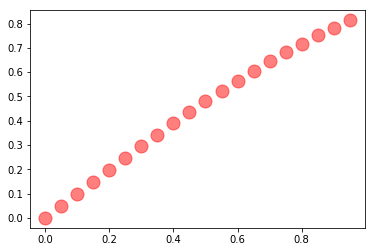

In [599]:
plt.plot(X_new_given_data, y_new_true[:-1], "ro", label="new data", markersize= 13, alpha=0.5)

In [600]:
with tf.Session() as sess:
    saver.restore(sess, "./saved_model_from_RNN_with_TensorFlow/jacob_test_rnn")
    
    new_input_data = np.sin(X_new_given_data).reshape(-1,20,1)
    
    y_new_pred = sess.run(outputs, feed_dict={X:new_input_data})
    
    

INFO:tensorflow:Restoring parameters from ./saved_model_from_RNN_with_TensorFlow/jacob_test_rnn


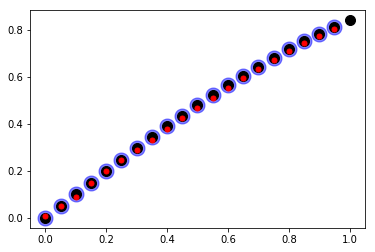

In [601]:
# plt.title("TEST RNN")

plt.plot(X_new_given_data,y_new_true[:-1], "bo", markersize= 15, alpha=0.5, label="given data")
plt.plot(X_base_data,y_new_true, "ko", markersize=10, label="target")
plt.plot(X_new_given_data,y_new_pred[0,:,0], "ro", markersize=5, label="prediction")